# ニューラルネットワークの学習

## 4.1 データから学習する<83>


「学習」とは、訓練データから最適な重みパラメータの値を自動取得すること。

そのための指標として**損失関数**を導入してその値が小さくなるように重みパラメータを探し出すということが学習の目的。

### 4.1.1 データ駆動



データ駆動とは、データを元に次のアクションを決めたり、意思決定を行ったりすることです。

機械学習による手法では、人の介入を避け、集められたデータからパターンを求めようとする。

たとえば、「５」を認識するアルゴリズムを

**特徴量**を抽出して、その特徴量のパターンを機械学習の技術で学習する方法が考えられる。（特徴量とは、入力データから本質的なデータを的確に抽出できるように設計された変換機）

### 4.1.2 訓練データとテストデータ<86>


機械学習の流れ

**訓練データ**だけを使って学習を行い最適なパラメータを探索

→**テストデータ**を使って訓練したモデルの実力を評価

なぜこの流れなのか？

それは**汎化性能**を高めるため

汎化性能...まだ見ぬデータにタする能力

## 4.2 損失関数 <87>

NNが最適なパラメータを探すうえで指標になるものが**損失関数**

### 4.2.1 2乗和誤差(sum of squared error)<88>

2乗和誤差は式(4.1)で書けるようにNNの出力と、正解となる教師データの各要素の差の2乗を計算して総和を求める。

$$E = \frac{1}{2}\sum_{k}(y_k - t_k)^2 \hspace{10mm} (4.1)$$

実装は以下である

In [ ]:
import numpy as np
def sum_squared_error(y, t):
  return 0.5 * np.sum((y - t) ** 2)

#「2」を正解としたone-hot表現
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#「2」の確率が一番高い(0.6)例
y1 =  [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

#「7」の確率が一番高い(0.6)例
y2 =  [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

print(f"「2」の確率が一番高い(0.6)例のMAE: {sum_squared_error(np.array(y1), np.array(t))}")
print(f"「7」の確率が一番高い(0.6)例のMAE: {sum_squared_error(np.array(y2), np.array(t))}")

「2」の確率が一番高い(0.6)例のMAE: 0.09750000000000003
「7」の確率が一番高い(0.6)例のMAE: 0.5975


実行結果の上のほうがMAEの値が低いので誤差が少ないことが容易にわかる。

### 4.2.2 交差エントロピー誤差

交差エントロピー誤差は以下の式で書ける。

$$E = -\sum_{k}t_k \mathrm{log}y_k \hspace{10mm} (4.2)$$

$t_k$は正解ラベルであるから、実質正解したものだけを対数和とってるだけだね。


例題を使って交差エントロピー誤差をもう少し理解

例：$(t_0, t_1, t_2) = (1, 0, 0)$のとき

(1)出力値$(y_0, y_1, y_2) = (0.8, 0.1, 0.1)$

$E = -1 * \mathrm{log}0.8 - 0 *\mathrm{log}0.1 - 0 *\mathrm{log}0.1 = 0.09$  

(2)出力値$(y_0, y_1, y_2) = (0.2, 0.7, 0.1)$

$E = -1 * \mathrm{log}0.2 - 0 *\mathrm{log}0.7 - 0 *\mathrm{log}0.1 = 1.61$

しっかりと誤差大きければ値が大きくなっててうれしい。

では、ここからは実装に入っていく。

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7 #y = 0をlogに入れるわけにはいかないのでちょびっと足しておく
  return -np.sum(t * np.log(y + delta))  

#「2」を正解としたone-hot表現
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#「2」の確率が一番高い(0.6)例
y1 =  [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]

#「7」の確率が一番高い(0.6)例
y2 =  [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

print(f"「2」の確率が一番高い(0.6)例のMAE: {cross_entropy_error(np.array(y1), np.array(t))}")
print(f"「7」の確率が一番高い(0.6)例のMAE: {cross_entropy_error(np.array(y2), np.array(t))}")

「2」の確率が一番高い(0.6)例のMAE: 0.510825457099338
「7」の確率が一番高い(0.6)例のMAE: 2.302584092994546


### 4.2.3 ミニバッチ学習

ここまでは一つのデータの損失関数の話で、こっからは訓練データ全体の損失関数が知りたいね。その際は訓練データ全部の損失関数の和が指標となるよね

上にある交差エントロピー誤差を訓練データすべての和の形に直すと以下の式になる

$$E = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk} \mathrm{log}y_{nk} \hspace{10mm} (4.3)$$

$N$...データ数

$t_{nk},y_{nk}$...n個目のデータのk番目の値

$\frac{1}{N}$でわっている理由は正規化ね。これをすることにより、一個当たりの損失関数という見方ができる


ミニバッチってなに？

→データ数が多すぎるとすべてを対象とした損失関数を求めるのは現実的じゃない。だから、データの一部を取り出して、そいつらで全体を近似する。この訓練だーたから選びだされた小さな塊を**ミニバッチ**とい。

なんか、統計学でいうところの標本みたいなもんだな。

### 4.2.4[バッチ対応版]交差エントロピー誤差実装<94>

4.2.3 ミニバッチ学習でやったことを用いて交差エントロピー誤差を実装していく。

In [ ]:
#まずデータのload
import sys,os
sys.path.append("/content/drive/MyDrive/DS/deep_learning/deep-learning-from-scratch-master")
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

#それぞれのデータの形状を出力
print(f"x_train.shape: {x_train.shape}")
print(f"t_train.shape: {t_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"t_test.shape: {t_test.shape}")

x_train.shape: (60000, 784)
t_train.shape: (60000,)
x_test.shape: (10000, 784)
t_test.shape: (10000,)


In [ ]:
#ミニバッチを定義する
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(f"batch_mask: {batch_mask}")

batch_mask: [48072 10978  8025 30051  6285  3868 35832 58489 36023 27493]


??batch_maskってなんでこんな名前なの

In [ ]:
#バッチ対応版交差エントロピー誤差を定義
def cross_entropy_error(y, t):
  if y.ndim ==1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrange(batch_size), t])) / batch_size

コード補足

```
np.log(y[np.arrange(batch_size), t])
```
np.arrange(batch_size)で0~batch_size -1までの配列を生成

例としてbatch_size = 5とすると

np.arrange(batch_size)は、[0, 1, 2, 3, 4]

### 4.2.5 なぜ損失関数を設定するのか
損失関数なんかなくても認識精度だけ見ておけばいいじゃないかという疑問があるかもしれないね。

では、なぜ損失関数を定義するのか、それは最適なパラメータを見つける時に損失関数が小さくなるように探しているからだよ。

もっというと、最適なパラメータ更新はパラメータの勾配(微分)を計算して求めているから。

逆に、なぜ認識精度を指標にしてはいけないかというと、**ほとんどの場所で微分が０**になるから！
→認識精度は離散的な値を取るので微分の意味がなくなる。

## 数値微分<97>

### 4.3.1 微分<97>

微分の定義通りに関数を実装してみる

In [ ]:
#ダメな微分の定義
def numerical_diff(f, x):
  h = 10e-50
  return (f(x + h) - f(x)) / h

定義通りに実装したら上のようになるが何がダメなんだろうか？

上関数のダメポイントは２つある。

1.分母が小さすぎる。

→大体$10^{-4}$くらいがうまく行くらしい。

2.分子に誤差が生まれる

→hを無限に小さくすることができないので、誤差が生まれてくる。

対策として(x + h)と(x - h)をとるとx中心の誤差となり、誤差が減少される。

これらを考慮して微分の式を定義し直すと

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2*h)

### 4.3.2 数値微分の例<100>


次の２次関数のx = 5,10における接線を求めてみよう

$$ y = 0.01x^{2} + 0.1x \hspace{10mm} (4.5)$$

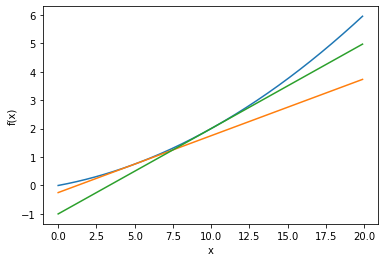

In [ ]:
##式(4.5)を定義
import numpy as np
import matplotlib.pyplot as plt

def function1(x):
  return 0.01*x**2 + 0.1*x

diff1 = numerical_diff(function1, 5)
diff2 = numerical_diff(function1, 10)

x = np.arange(0, 20, 0.1)
y = function1(x)
y1 = diff1 * (x - 5) + function1(5)
y2 = diff2 * (x - 10) + function1(10)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.plot(x,y1)
plt.plot(x,y2)

plt.show()

### 4.3.3 偏微分<102>

$$ f(x_0, x_1) = x_0^{2} + x_1^{2} \hspace{10mm} (4.6)$$
を偏微分することを考えよう

問1:$x_0= 3,x_1 = 4$の時$x_0$に対する偏微分$\frac{\partial f}{\partial x_0}$

問2:$x_0= 3,x_1 = 4$の時$x_1$に対する偏微分$\frac{\partial f}{\partial x_1}$

In [ ]:
#問1
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

print(f"問1の回答: {numerical_diff(function_tmp1, 3.0)}")

#問2
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

print(f"問2の回答: {numerical_diff(function_tmp2, 4.0)}")

問1の回答: 6.00000000000378
問2の回答: 7.999999999999119


## 4.4 勾配<103>

上の偏微分では特定の値に対して偏微分を求めた。

ここから一般の変数に対して偏微分を求めることを考えよう。

$(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1} )$のように全ての変数の偏微分をベクトルとしてまとめたものを**勾配(gradient)**という。

勾配の実装は以下のようにできる。

In [ ]:
#勾配の実装
#まず勾配を求める関数の定義
def function_2(x):
  return x[0]**2 + x[1]**2

def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) #xと同じ形状の配列でその要素が全て0

  for idx in range(x.size):
    tmp_val = x[idx]
    #f(x + h)の計算
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x - h)の計算
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

print(f"function_2の(3,4)での勾配: {numerical_gradient(function_2, np.array([3.0, 4.0]))} ")
print(f"function_2の(0,2)での勾配: {numerical_gradient(function_2, np.array([0.0, 2.0]))} ")
print(f"function_2の(3,0)での勾配: {numerical_gradient(function_2, np.array([3.0, 0.0]))} ")

function_2の(3,4)での勾配: [6. 8.] 
function_2の(0,2)での勾配: [0. 4.] 
function_2の(3,0)での勾配: [6. 0.] 


勾配が示す方向は、各場所において**関数の値を最も減らす方向**

### 4.1.1 勾配法<106>

**勾配法**とは、勾配を利用して関数の最小値を探そうとする方法。

ただし、勾配が示す方向が必ず最小値なのかどうかはわからないので注意が必要。

勾配法の式は以下で書ける。
$$x_0 = x_0 - ɳ\frac{\partial f}{\partial x_0} \\ x_1 = x_1 - ɳ\frac{\partial f}{\partial x_1}  \\ (4.7)$$

$ɳ$は更新の量を表しており、NNの学習においては**学習率**と呼ばれる。

これは、１回の学習でどれだけパラメータを更新するかを決める量。

勾配降下法を実装してみよう。

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -=lr * grad

  return x

f...最適化したい関数

init_x...初期値

lr...学習率

step_num...勾配法による繰り返しの数(この数だけ更新する)

In [ ]:
#function_2の最小値を勾配法で求める
init_x = np.array([-3.0, 4.0])
print(f"初期値(3,4)から勾配法(lr=0.1): {gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)}")
print(f"初期値(3,4)から勾配法(lr=10): {gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)}")
print(f"初期値(3,4)から勾配法(lr=1e-10): {gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)}")

初期値(3,4)から勾配法(lr=0.1): [-6.11110793e-10  8.14814391e-10]
初期値(3,4)から勾配法(lr=10): [ 2.34235971e+12 -3.96091057e+12]
初期値(3,4)から勾配法(lr=1e-10): [ 2.34235971e+12 -3.96091057e+12]


学習率が大きすぎると、大きな値へ発散してしまう。

学習率が小さすぎると、ほとんど更新されていない。

### 4.4.2 NNに対する勾配

NNでいう勾配とは、重みパラメータに関する損失関数の勾配。

形状が2×3で重み$\mathbf{W}$をもつNNがあり、損失関数を$L$とすると、重みと勾配は以下のようにかける。

$$\mathbf{W} = \left( \begin{matrix}w_{11} & w_{21} & w_{31}\\ w_{12} & w_{22} & w_{32} \end{matrix} \right) $$
$$\frac{\partial L}{\partial \mathbf{W}} = \left( \begin{matrix}\frac{\partial L}{w_{11}} & \frac{\partial L}{w_{21}} & \frac{\partial L}{w_{31}}\\ \frac{\partial L}{w_{12}} & \frac{\partial L}{w_{22}} & \frac{\partial L}{w_{32}} \end{matrix} \right)$$

たとえば、$\frac{\partial L}{w_{11}}$は$w_{11}$を少し変化させると、損失関数はどれだけ変化するのかを表している。

簡単なNNに対して勾配を求める例をやってみよう。

In [ ]:
##NNに対して勾配を求める例
import sys,os
sys.path.append("/content/drive/MyDrive/DS/deep_learning/deep-learning-from-scratch-master")
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3) #2*3の正規分布に従った乱数

  #予測するためのメソッド
  def predict(self, x):
    return np.dot(x, self.W)

  #損失関数の値を求めるメソッド
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

net = simpleNet()
print(f"重みパラメータ: \n {net.W}")
x = np.array([0.6, 0.9])
pred = net.predict(x)
print(f"入力値(0.6, 0.9)の出力値(予測): {pred}")
print(f"最大値のインデックス: {np.argmax(pred)}")

t = np.array([0, 0, 1]) #正解ラベル
print(f"正解ラベル[0, 0, 1]の誤差関数: {net.loss(x, t)}")

重みパラメータ: 
 [[-0.53377288 -1.22275584 -0.25792771]
 [ 0.71507717 -0.97840873 -1.52272425]]
入力値(0.6, 0.9)の出力値(予測): [ 0.32330573 -1.61422136 -1.52520845]
最大値のインデックス: 0
正解ラベル[0, 0, 1]の誤差関数: 2.112054405492041


In [ ]:
#勾配を求める
def f(W): #Wはダミー
  return net.loss(x, t)

#上の関数はlambda式で書くといい。
#f = lambda w: net.loss

dW = numerical_gradient(f, net.W)
print(f"勾配: \n {dW}")

勾配: 
 [[ 0.46099527  0.06641087 -0.52740613]
 [ 0.6914929   0.0996163  -0.7911092 ]]


## 4.5学習アルゴリズムの実装<112>

この４章で、「損失関数」、「ミニバッチ」「勾配」と重要キーワードが出てきたが、こいつらを実際にNNに組み込んでくことを考えてみる。

NNの学習は以下の4step

**step1(ミニバッチ)**

訓練データの中からランダムに一部のデータを選びだす。(標本抽出的な)

**step2(勾配の計算)**

ミニバッチの損失関数を減らすため、各重みパラメータを求める。

**step3(パラメータの更新)**

重みパラメータを勾配方向に更新していく

以上、step1~step3を繰り返す。

この方法を、勾配降下法を用いてパラメータ更新を行うが、ミニバッチが無作為に選ばれていることから、**確率的勾配降下法(SGD)**という。

### 4.5.1 2層NNのクラス<113>

2層NNを TwoLayerNet という名前のクラスとして実装。

In [ ]:
import sys,os
sys.path.append("/content/drive/MyDrive/DS/deep_learning/deep-learning-from-scratch-master")
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    #重みの初期化
    self.params = {}
    self.params['W1'] = weight_init_std * \
                       np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * \
                       np.random.randn(input_size, hidden_size)
    self.params['b2'] = np.zeros(hidden_size)  

  #認識(推論)を行う。xは画像データ
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  #x:入力データ, t:教師データ
  def loss(self, x, t):
    y = self.predict(x)
    
    return cross_entropy_error(y, t)

  #認識精度を求める
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  
  #重みパラメータに対する勾配を計算する。
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads["W1"] = numerical_gradient(loss_W, self.params['W1'])
    grads["b1"] = numerical_gradient(loss_W, self.params['b1'])
    grads["W2"] = numerical_gradient(loss_W, self.params['W2'])
    grads["b2"] = numerical_gradient(loss_W, self.params['b2'])

    return grads

2つのインスタンス変数params,gradがあり

params変数には重みパラメータ

grad変数にはparams変数と対応するように各パラメータの勾配が入ってる。

初期化メソッドでは重みパラメータの初期化を行う。重みパラメータの初期化については後で詳しくやるとして、ここでは、重みはガウス分布に従う乱数という程度の認識で良い。

numerical_gradientは次章で誤差逆伝播法を用いて高速化する。

### 4.5.2ミニバッチ学習の実装<117>

TwoLayerNetクラスを対象に、MNISTデータセットを使って学習を行います。

In [ ]:
import sys,os
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(X_train, t_train), (X_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

train_loss_list = []

#ハイパーパラメータ
iters_num = 10000 #繰り返し回数(iteration)
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  #ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #勾配の計算
  grad = network.numerical_gradient(x_batch, t_batch)
  #grad = network.gradient(x_batch, t_batch) # 高速版
  
  #パラメータの更新
  for key in ("W1", "b1","W2", "b2"):
    network.params[key] -=learning_rate * grad[key]

  #学習経過の記録
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

KeyboardInterrupt: ignored

このコードは、ミニバッチサイズを100

→毎回60000個の訓練データから、ランダムに100個(batch_mask)のデータを抜き出して

→その100個のミニバッチを対象に勾配を求めて、SGDによりパラメータ更新

という手順を踏んでいる。

### 4.5.3テストデータで評価


訓練データの損失関数の値が減ったかどうかだけでは、汎化性能が高いかどうかの判断には繋がらない。
overfittingを起こしているかもしれないから。

そこで、学習を行う過程で定期的に訓練データとテストデータを対象に認識精度を記録しておこう。



定期的に記録を今回は1epochとしておこう。

**エポック(epoch)**とは、たとえば1000個の訓練データに対して、10個のミニバッチで学習する場合、SGDを100回繰り返したら、全てのデータを見たことになる。この100回 = 1epoch。

In [ ]:
#学習を行う過程で定期的に訓練データとテストデータを対象に認識精度を記録
import sys,os
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

(X_train, t_train), (X_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1) #1epochあたりの繰り返し回数

#ハイパーパラメータ
iters_num = 10000 #繰り返し回数(iteration)
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  #ミニバッチの取得
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #勾配の計算
  grad = network.numerical_gradient(x_batch, t_batch)
  #grad = network.gradient(x_batch, t_batch) # 高速版
  
  #パラメータの更新
  for key in ("W1", "b1","W2", "b2"):
    network.params[key] -=learning_rate * grad[key]

  #学習経過の記録
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  
  #1epochごとの認識精度を計算
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test.acc)
    print("train acc, test acc |" + str(train_acc) + "," + str(test_acc))